# <span style="color:#102c57;font-family:roboto;font-weight:bold">Data Analysis of Police Shootings in US</span>

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 64.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.18.0
    Uninstalling plotly-5.18.0:
      Successfully uninstalled plotly-5.18.0
Note: you may need to restart the kernel to use updated packages.


## <span style="color:#102c57;font-family:roboto;font-weight:bold">Import Libraries</span>

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# This might be helpful:
from collections import Counter

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Notebook Presentation</span>

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Load the Data</span>

In [5]:
df_hh_income = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding="windows-1252")

In [6]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


## <span style="color:#102c57;font-family:roboto;font-weight:bold">Preliminary Data Exploration</span>

<span style="color:#3E3790">1. What is the shape of the DataFrames? </span>  
<span style="color:#3E3790">2. How many rows and columns do they have?</span>  
<span style="color:#3E3790">3. What are the column names?</span>  
<span style="color:#3E3790">4. Are there any NaN values or duplicates?</span>


In [7]:
# Assuming dataframes is a list of your DataFrames
dataframes = [("df_hh_income", df_hh_income), ("df_pct_poverty", df_pct_poverty), 
              ("df_pct_completed_hs", df_pct_completed_hs), ("df_share_race_city", df_share_race_city), 
              ("df_fatalities", df_fatalities)]

# Create a list to store the table data
table_data = []

# Iterate over each DataFrame
for name, df in dataframes:
    num_rows, num_columns = df.shape
    table_data.append([name, num_rows, num_columns])

# Create and print the table
table_headers = ["DataFrame", "Number of Rows", "Number of Columns"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))



+---------------------+------------------+---------------------+
| DataFrame           |   Number of Rows |   Number of Columns |
+=====================+==================+=====================+
| df_hh_income        |            29322 |                   3 |
+---------------------+------------------+---------------------+
| df_pct_poverty      |            29329 |                   3 |
+---------------------+------------------+---------------------+
| df_pct_completed_hs |            29329 |                   3 |
+---------------------+------------------+---------------------+
| df_share_race_city  |            29268 |                   7 |
+---------------------+------------------+---------------------+
| df_fatalities       |             2535 |                  14 |
+---------------------+------------------+---------------------+


In [8]:
# Assuming dataframes is a list of tuples where each tuple contains the name of the DataFrame as a string and the DataFrame itself
dataframes = [("df_hh_income", df_hh_income), ("df_pct_poverty", df_pct_poverty), 
              ("df_pct_completed_hs", df_pct_completed_hs), ("df_share_race_city", df_share_race_city), 
              ("df_fatalities", df_fatalities)]

# Iterate over each tuple (name, df) in dataframes
for name, df in dataframes:
    print(f"DataFrame: {name}")
    print("Column names:")
    print(df.columns.tolist())
    print()


DataFrame: df_hh_income
Column names:
['Geographic Area', 'City', 'Median Income']

DataFrame: df_pct_poverty
Column names:
['Geographic Area', 'City', 'poverty_rate']

DataFrame: df_pct_completed_hs
Column names:
['Geographic Area', 'City', 'percent_completed_hs']

DataFrame: df_share_race_city
Column names:
['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

DataFrame: df_fatalities
Column names:
['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']



In [9]:
# Assuming dataframes is a list of tuples where each tuple contains the name of the DataFrame as a string and the DataFrame itself
dataframes = [("df_hh_income", df_hh_income), ("df_pct_poverty", df_pct_poverty), 
              ("df_pct_completed_hs", df_pct_completed_hs), ("df_share_race_city", df_share_race_city), 
              ("df_fatalities", df_fatalities)]

# Iterate over each tuple (name, df) in dataframes
for name, df in dataframes:
    print(f"DataFrame: {name}")
    # Check for NaN values
    nan_values = df.isna().sum()
    print("NaN values:")
    print(nan_values)
    # Check for duplicates
    num_duplicates = df.duplicated().sum()
    print("Number of duplicates:", num_duplicates)
    print()


DataFrame: df_hh_income
NaN values:
Geographic Area     0
City                0
Median Income      51
dtype: int64
Number of duplicates: 0

DataFrame: df_pct_poverty
NaN values:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Number of duplicates: 0

DataFrame: df_pct_completed_hs
NaN values:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Number of duplicates: 0

DataFrame: df_share_race_city
NaN values:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Number of duplicates: 0

DataFrame: df_fatalities
NaN values:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city    

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Data Cleaning - Check for Missing Values and Duplicates</span>

Consider how to deal with the NaN values. Perhaps substituting `mean` is appropriate. 

In [10]:
df_filled_fatalities = df_fatalities.copy()

In [11]:
df_filled_fatalities['age'] = df_filled_fatalities['age'].fillna( df_filled_fatalities['age'].mean())

In [12]:
# Substitute NaN values in a specific column with a backward fill
df_filled_fatalities['armed'] = df_filled_fatalities['armed'].fillna(method='bfill')
df_filled_fatalities['race'] = df_filled_fatalities['race'].fillna(method='bfill')
df_filled_fatalities['flee'] = df_filled_fatalities['flee'].fillna(method='bfill')

/tmp/ipykernel_34/1083802182.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_fatalities['armed'] = df_filled_fatalities['armed'].fillna(method='bfill')
/tmp/ipykernel_34/1083802182.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_fatalities['race'] = df_filled_fatalities['race'].fillna(method='bfill')
/tmp/ipykernel_34/1083802182.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_fatalities['flee'] = df_filled_fatalities['flee'].fillna(method='bfill')


In [13]:
df_filled_fatalities.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Chart the Poverty Rate in each US State</span>

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot


In [14]:
df_filled_pct_poverty = df_pct_poverty.copy()

In [15]:
df_filled_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [16]:
# Find the indices where the 'poverty_rate' column contains the problematic string '-'
error_indices = df_filled_pct_poverty[df_filled_pct_poverty['poverty_rate'] == '-'].index

print("Indices of rows with problematic string value '-':", error_indices)


Indices of rows with problematic string value '-': Index([  573,   608,   632,   637,   662,   667,   676,   685,   711,   712,
       ...
       29198, 29220, 29224, 29238, 29244, 29261, 29266, 29273, 29289, 29304],
      dtype='int64', length=201)


In [17]:
# Replace '-' values with NaN in the 'poverty_rate' column
df_filled_pct_poverty['poverty_rate'] = df_filled_pct_poverty['poverty_rate'].replace('-', np.nan)
df_filled_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [18]:
df_cleaned = df_filled_pct_poverty.dropna()
df_cleaned

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [19]:
df_cleaned.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [20]:
# Convert 'percent_completed_hs' column to float
df_cleaned['poverty_rate'] = df_cleaned['poverty_rate'].astype(float)


/tmp/ipykernel_34/659747914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['poverty_rate'] = df_cleaned['poverty_rate'].astype(float)


In [21]:
df_agg_poverty_rate_max_per_state = df_cleaned.groupby('Geographic Area').agg({'poverty_rate':'mean'})
df_agg_poverty_rate_reset = df_agg_poverty_rate_max_per_state.reset_index()
sorted_poverty_rate = df_agg_poverty_rate_reset.sort_values(by='poverty_rate')

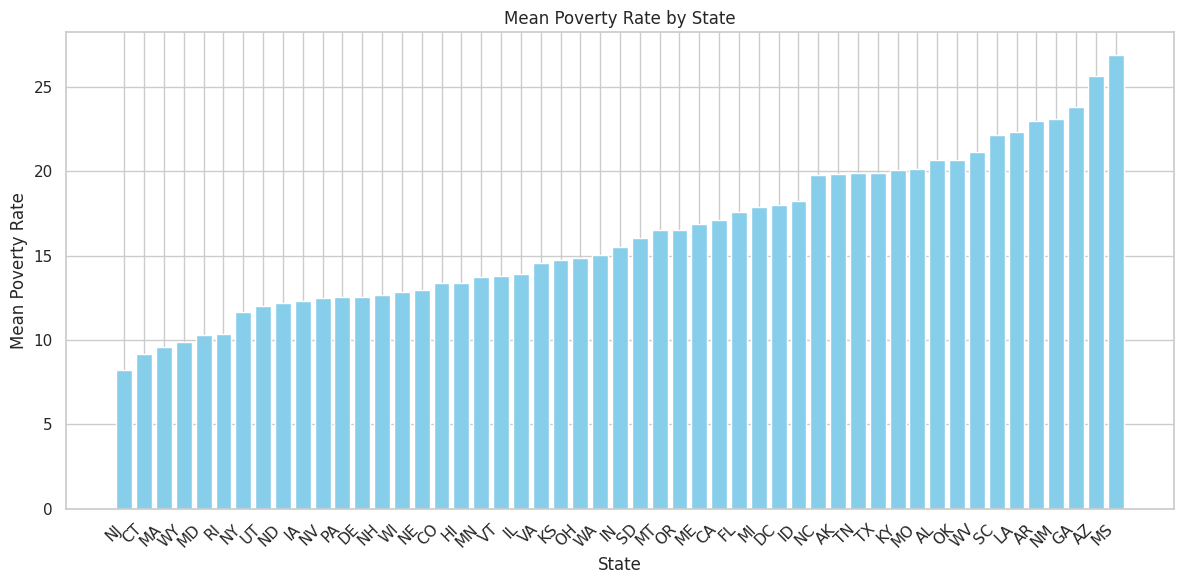

In [61]:
# Assuming df_agg_poverty_rate_max_per_state is your DataFrame containing the aggregated mean poverty rate per state

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_poverty_rate['Geographic Area'], sorted_poverty_rate['poverty_rate'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
# Find the state with the highest mean poverty rate
state_highest_mean_poverty_rate = sorted_poverty_rate['Geographic Area'].iloc[-1]

# Find the state with the lowest mean poverty rate
state_lowest_mean_poverty_rate = sorted_poverty_rate['Geographic Area'].iloc[0]                                                                           

highest_poverty_rate = sorted_poverty_rate['poverty_rate'].iloc[-1]
lowest_poverty_rate = sorted_poverty_rate['poverty_rate'].iloc[0]

print(f"State with the highest mean poverty rate is {state_highest_mean_poverty_rate} with {highest_poverty_rate:.2f}%")
print(f"State with the lowest mean poverty rate is {state_lowest_mean_poverty_rate} with {lowest_poverty_rate:.2f}%")


State with the highest mean poverty rate is MS with 26.88%
State with the lowest mean poverty rate is NJ with 8.19%


## <span style="color:#102c57;font-family:roboto;font-weight:bold">Chart the High School Graduation Rate by US State</span>

    1. Show the High School Graduation Rate in ascending order of US States. 
    2. Which state has the lowest high school graduation rate? 
    3. Which state has the highest?

In [24]:
# Find the indices where the 'percent_completed_hs' column contains the problematic string '-'
error_indices = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] == '-'].index

print("Indices of rows with problematic string value '-':", error_indices)
print(len(error_indices))

Indices of rows with problematic string value '-': Index([  573,   632,   637,   662,   667,   676,   685,   711,   712,   726,
       ...
       29220, 29224, 29227, 29238, 29244, 29261, 29266, 29273, 29289, 29304],
      dtype='int64', length=197)
197


In [25]:
# Replace '-' values with NaN in the 'poverty_rate' column
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-', np.nan)
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [26]:
df_pct_completed_hs.isna().sum()

Geographic Area           0
City                      0
percent_completed_hs    197
dtype: int64

In [27]:
df_cleaned_hs = df_pct_completed_hs.dropna()
df_cleaned_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [28]:
df_cleaned_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [29]:
# Convert 'percent_completed_hs' column to float
df_cleaned_hs['percent_completed_hs'] = df_cleaned_hs['percent_completed_hs'].astype(float)

/tmp/ipykernel_34/591668006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_hs['percent_completed_hs'] = df_cleaned_hs['percent_completed_hs'].astype(float)


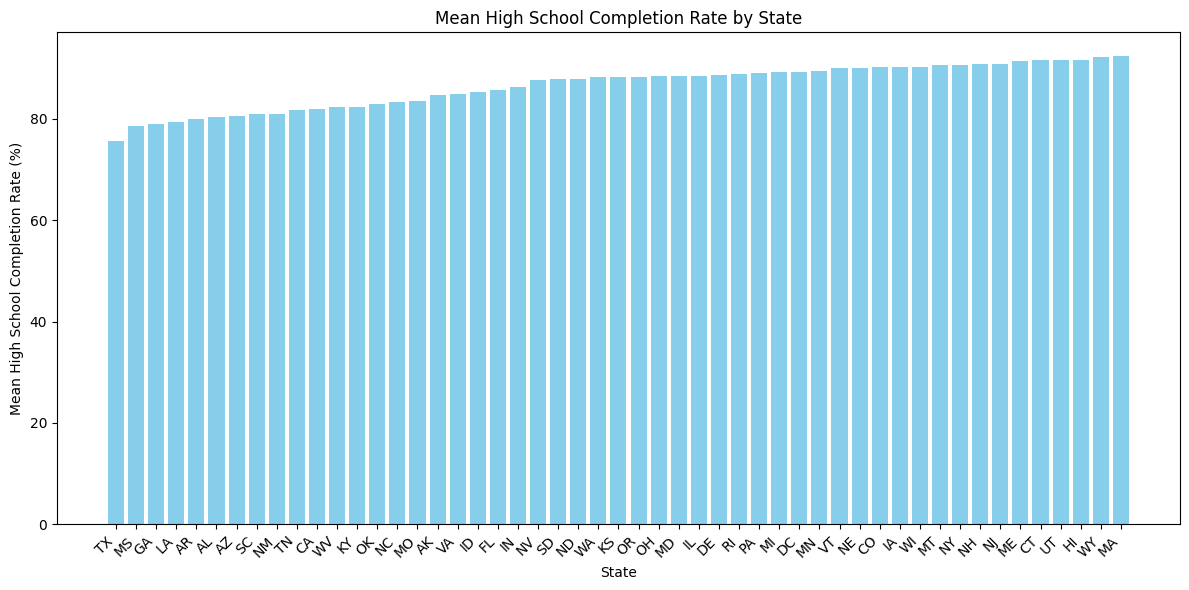

In [30]:
# Assuming df is your DataFrame containing the High School Graduation Rate data

# Group the DataFrame by 'Geographic Area' (state) and calculate the mean 'percent_completed_hs'
df_agg_hs_completion = df_cleaned_hs.groupby('Geographic Area').agg({'percent_completed_hs':'mean'})
df_agg_hs_completion_reset = df_agg_hs_completion.reset_index()
df_sorted_hs_completion_rate = df_agg_hs_completion_reset.sort_values(by='percent_completed_hs')

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sorted_hs_completion_rate['Geographic Area'], df_sorted_hs_completion_rate['percent_completed_hs'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Mean High School Completion Rate (%)')
plt.title('Mean High School Completion Rate by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
state_highest_hs_completion_rate = df_sorted_hs_completion_rate['Geographic Area'].iloc[-1]
state_lowest_hs_completion_rate = df_sorted_hs_completion_rate['Geographic Area'].iloc[0]
lowest_rate = df_sorted_hs_completion_rate['percent_completed_hs'].iloc[0]
highest_rate = df_sorted_hs_completion_rate['percent_completed_hs'].iloc[-1]
print(f'Lowest high school graduation rate is {state_lowest_hs_completion_rate} with {lowest_rate:.2f}%')
print(f'Highest high school graduation rate: {state_highest_hs_completion_rate} with {highest_rate:.2f}%')


Lowest high school graduation rate is TX with 75.69%
Highest high school graduation rate: MA with 92.40%


## <span style="color:#102c57;font-family:roboto;font-weight:bold">Visualise the Relationship between Poverty Rates and High School Graduation Rates</span>

    Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

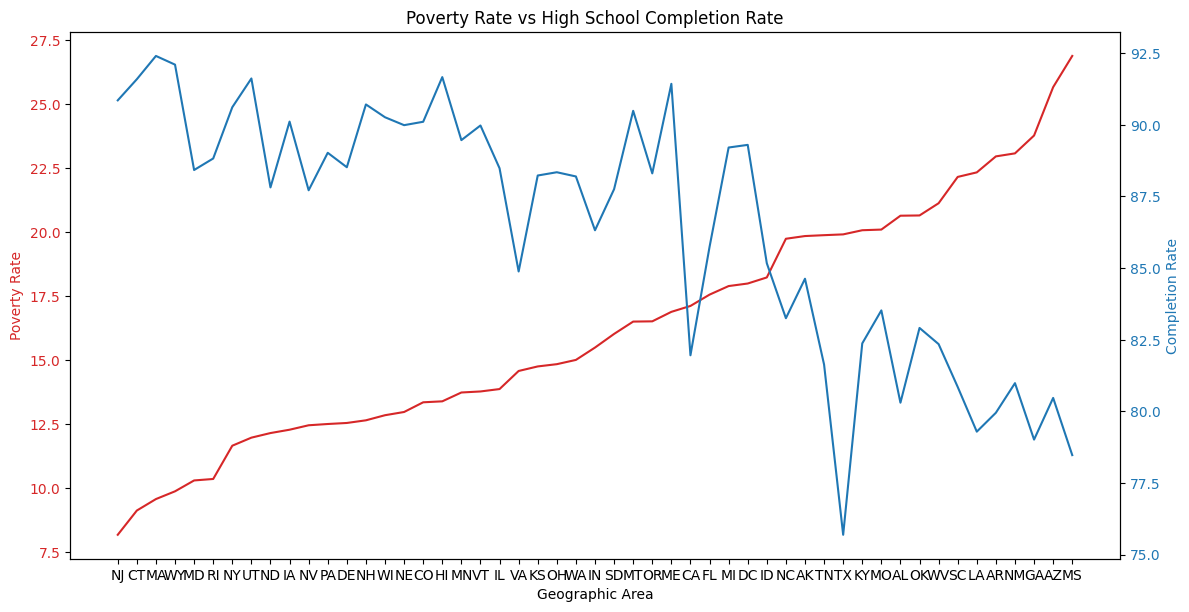

In [32]:
# Merge both DataFrames on 'Geographic Area'
df_combined = pd.merge(sorted_poverty_rate, df_sorted_hs_completion_rate, on='Geographic Area')

# Sort by Poverty Rate for better visualization
df_combined = df_combined.sort_values(by='poverty_rate')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Geographic Area')
ax1.set_ylabel('Poverty Rate', color=color)
ax1.plot(df_combined['Geographic Area'], df_combined['poverty_rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Completion Rate', color=color)
ax2.plot(df_combined['Geographic Area'], df_combined['percent_completed_hs'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Poverty Rate vs High School Completion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_o

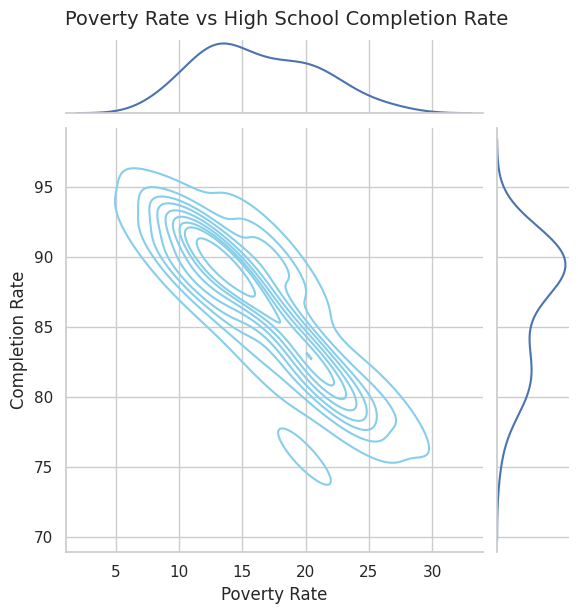

In [33]:
sns.set(style="whitegrid")
g = sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=df_combined, kind='kde', 
                  joint_kws={'color': 'skyblue'}, size=7)
#g.plot_joint(sns.kdeplot, color='blue', zorder=0, levels=6)
g.set_axis_labels('Poverty Rate', 'Completion Rate', fontsize=12)
plt.suptitle('Poverty Rate vs High School Completion Rate', fontsize=14, y=1.02)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


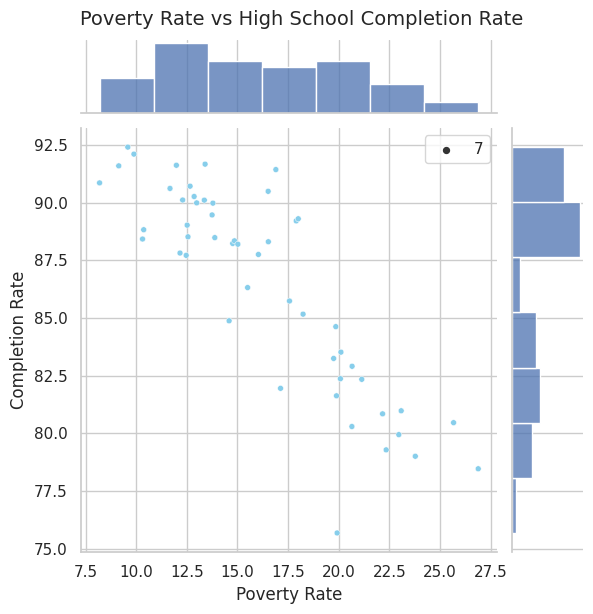

In [34]:
sns.set(style="whitegrid")
g = sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=df_combined, kind='scatter', 
                  joint_kws={'color': 'skyblue'}, size=7)
g.set_axis_labels('Poverty Rate', 'Completion Rate', fontsize=12)
plt.suptitle('Poverty Rate vs High School Completion Rate', fontsize=14, y=1.02)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

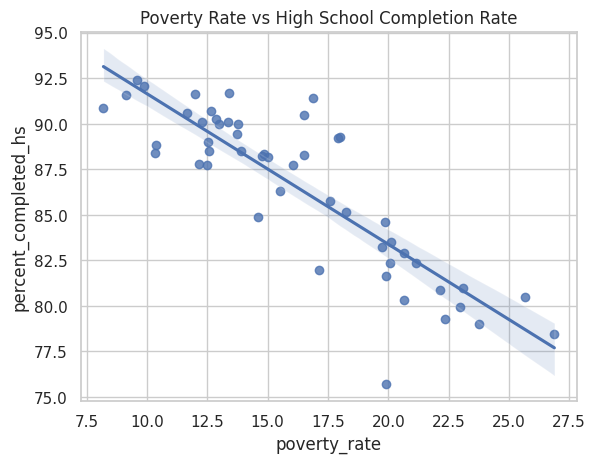

In [35]:
# Create a regplot
sns.regplot(data=df_combined, x='poverty_rate', y='percent_completed_hs')

# Customize the plot
plt.title('Poverty Rate vs High School Completion Rate')
plt.show()

/tmp/ipykernel_34/2368950183.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_combined,shade=True, cut=3)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future 

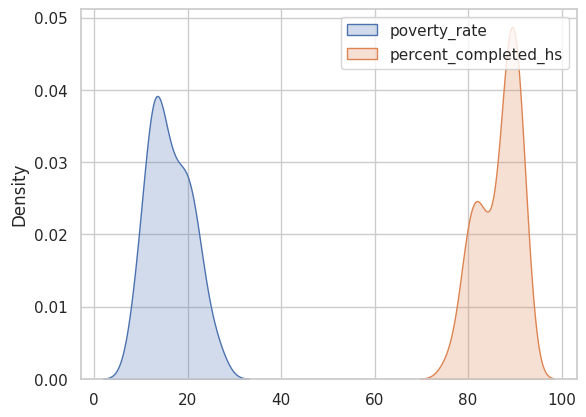

In [36]:
sns.kdeplot(data=df_combined,shade=True, cut=3)
plt.show()

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State</span>

    Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [37]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [38]:
df_share_race_city['Geographic area']

0        AL
1        AL
2        AL
3        AL
4        AL
         ..
29263    WY
29264    WY
29265    WY
29266    WY
29267    WY
Name: Geographic area, Length: 29268, dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/si

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

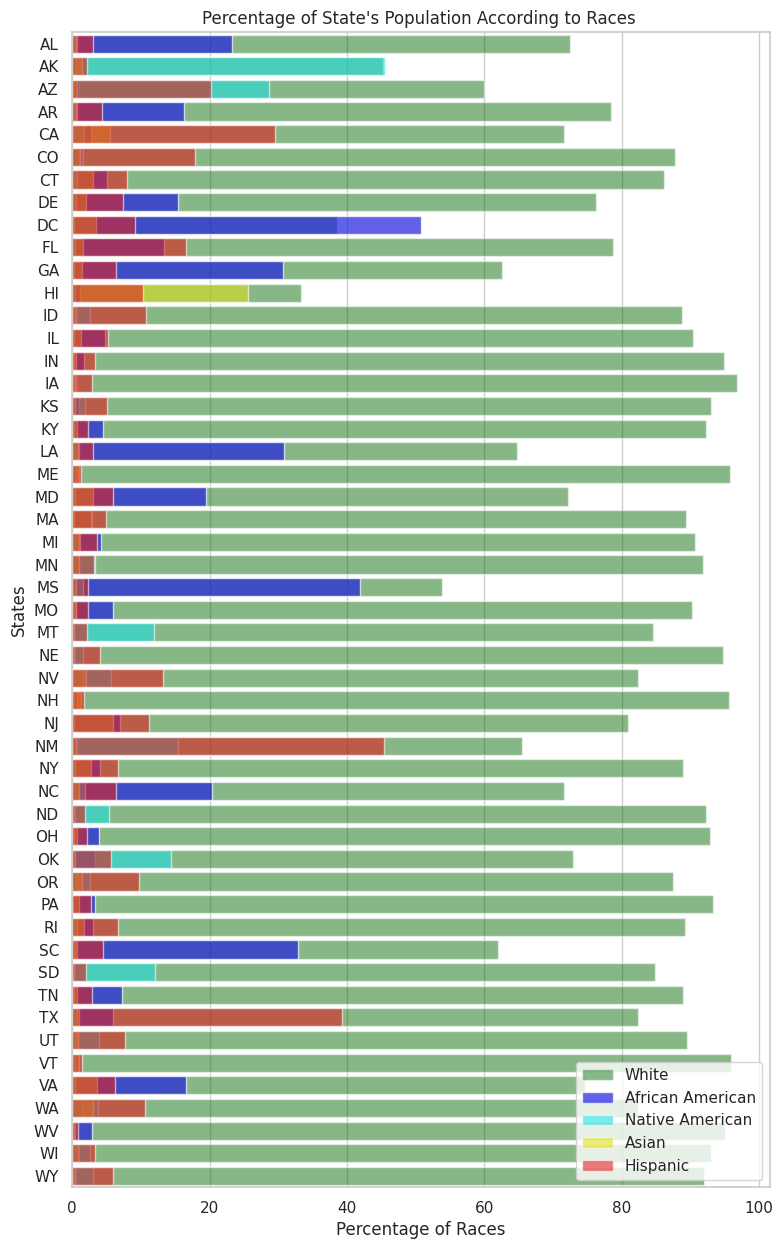

In [39]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
df_share_race_city.replace(['-'],0.0,inplace = True)
df_share_race_city.replace(['(X)'],0.0,inplace = True)
df_share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = df_share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(df_share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = df_share_race_city[df_share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Create Donut Chart by of People Killed by Race</span>
Hint: Use `.value_counts()`

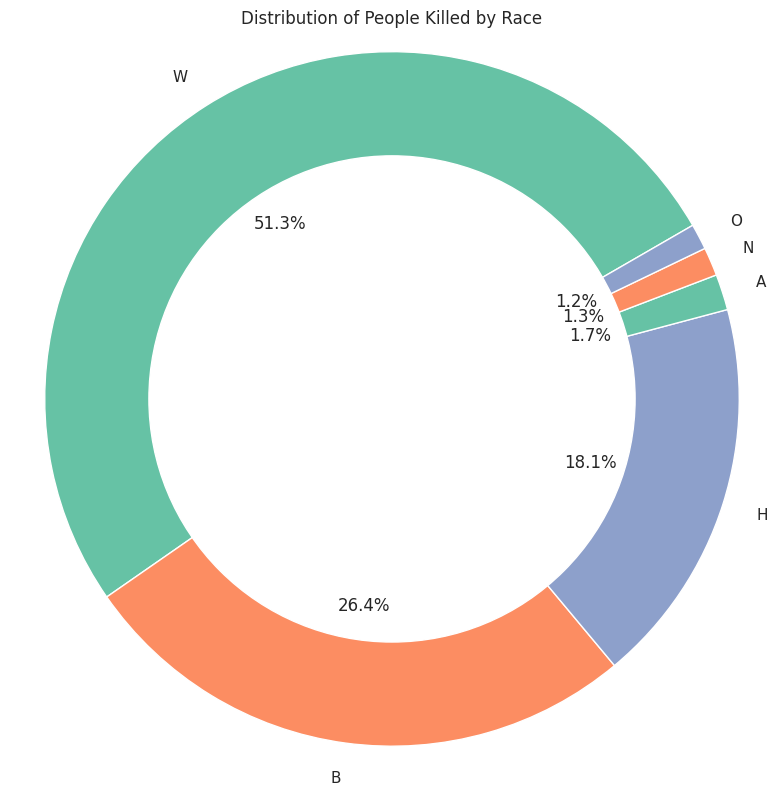

In [40]:
# Calculate value counts of 'Race'
race_counts = df_fatalities['race'].value_counts()

# Plotting the Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=30, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
# Draw a white circle at the center to create the donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Distribution of People Killed by Race')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Create a Chart Comparing the Total Number of Deaths of Men and Women</span>

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [41]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


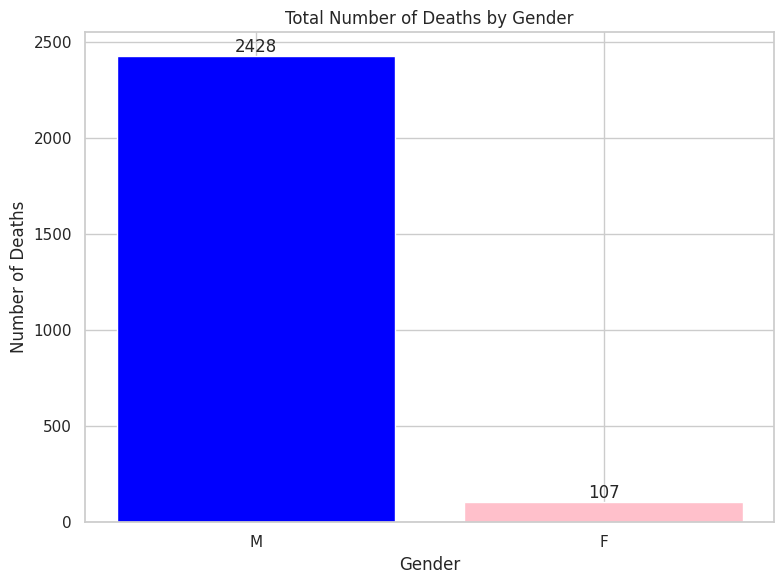

Men are killed 2321 more times compared to women.


In [42]:
# Calculate total deaths by gender
gender_counts = df_fatalities['gender'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.title('Total Number of Deaths by Gender')

# Add text annotations for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

# Print the difference in deaths between men and women
print(f"Men are killed {gender_counts['M'] - gender_counts['F']} more times compared to women.")

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Create a Box Plot Showing the Age and Manner of Death</span>

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

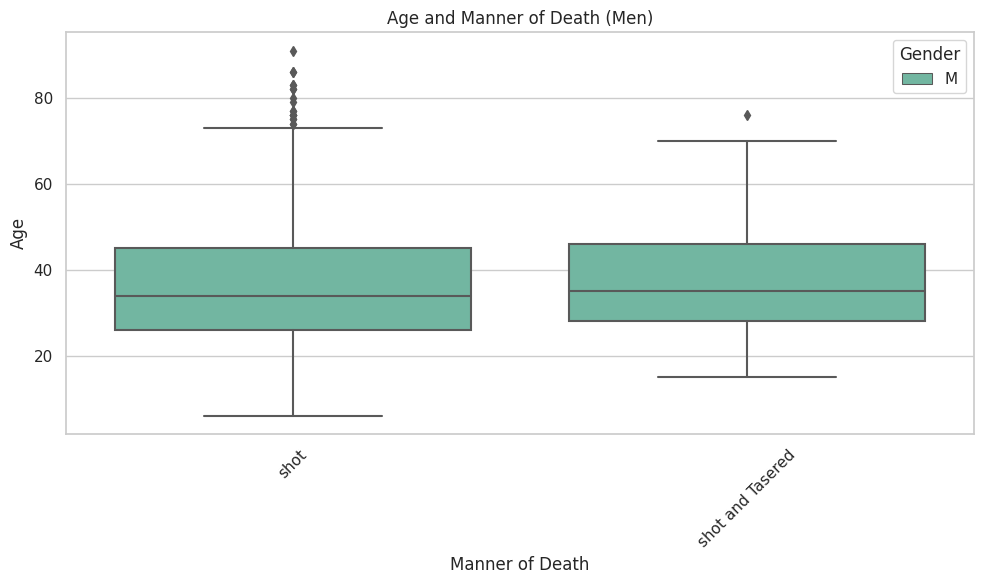

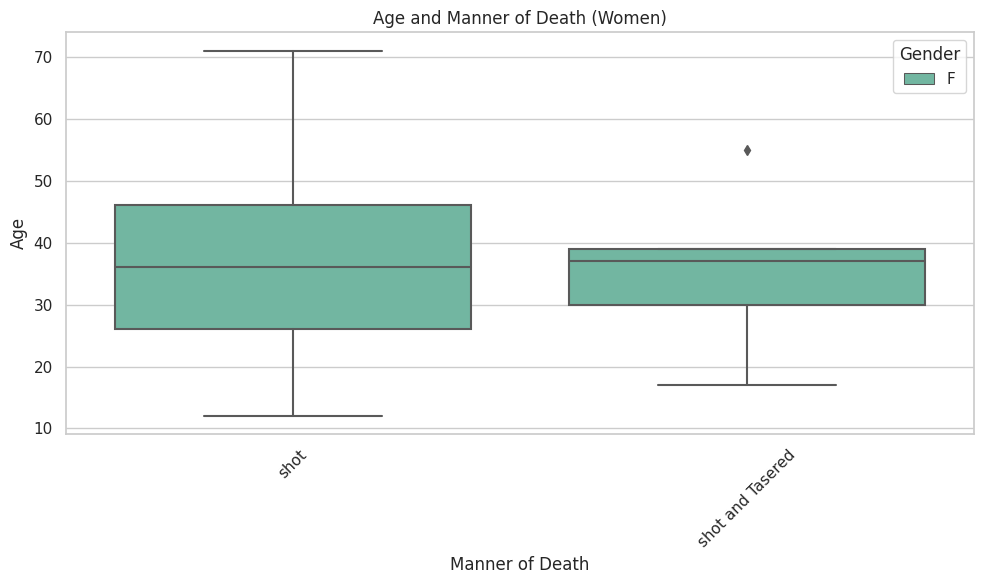

In [43]:
# Filter data for men and women
men_data = df_fatalities[df_fatalities['gender'] == 'M']
women_data = df_fatalities[df_fatalities['gender'] == 'F']

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='manner_of_death', y='age', data=men_data, hue='gender', palette='Set2')
plt.title('Age and Manner of Death (Men)')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='manner_of_death', y='age', data=women_data, hue='gender', palette='Set2')
plt.title('Age and Manner of Death (Women)')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Were People Armed?</span> 

1. In what percentage of police killings were people armed? 
2. Create chart that show what kind of weapon (if any) the deceased was carrying. 
3. How many of the people killed by police were armed with guns versus unarmed? 

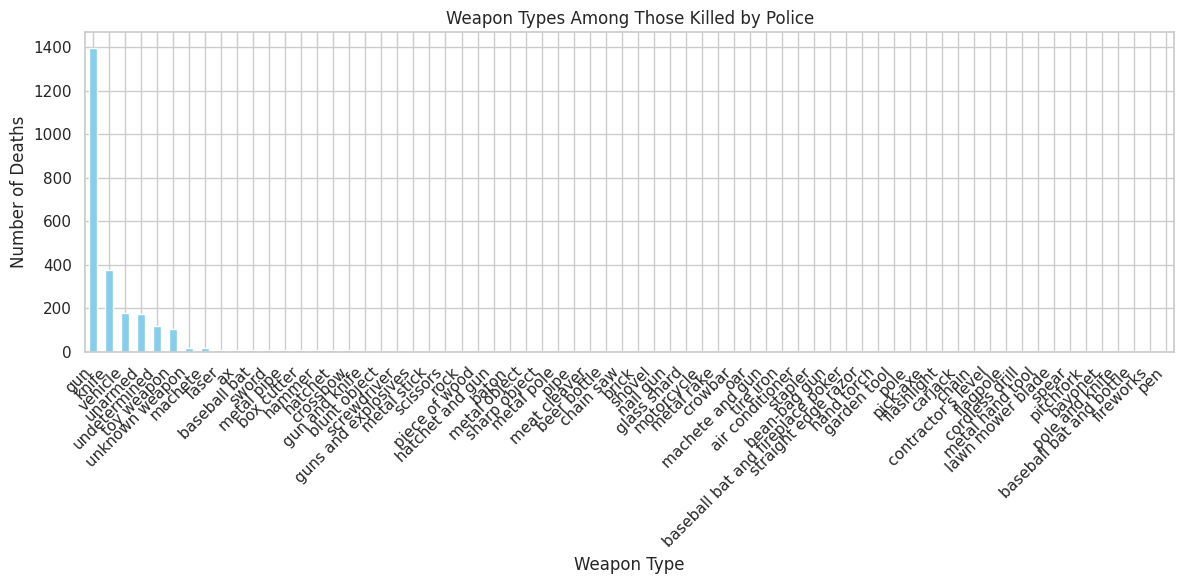

Percentage of police killings where individuals were armed: 99.64%
Percentage of police killings where individuals were unarmed: 0.36%


In [44]:
# Count the occurrences of each type of weapon
weapon_counts = df_fatalities['armed'].value_counts()

# Calculate total number of people killed by police
total_killed = len(df_fatalities)

# Calculate percentages
armed_percentage = (weapon_counts.sum() / total_killed) * 100
unarmed_percentage = (1 - (weapon_counts.sum() / total_killed)) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
weapon_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Deaths')
plt.title('Weapon Types Among Those Killed by Police')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the percentages
print(f"Percentage of police killings where individuals were armed: {armed_percentage:.2f}%")
print(f"Percentage of police killings where individuals were unarmed: {unarmed_percentage:.2f}%")

## <span style="color:#102c57;font-family:roboto;font-weight:bold">How Old Were the People Killed?</span>
Work out what percentage of people killed were under 25 years old. 

In [45]:
# Calculate total number of people killed
total_killed = len(df_fatalities)

# Calculate number of people under 25 years old
under_25_count = len(df_fatalities[df_fatalities['age'] < 25])

# Calculate percentage of people under 25 years old
under_25_percentage = (under_25_count / total_killed) * 100

# Print the results
print(f"Percentage of people killed who were under 25 years old: {under_25_percentage:.2f}%")

Percentage of people killed who were under 25 years old: 17.75%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


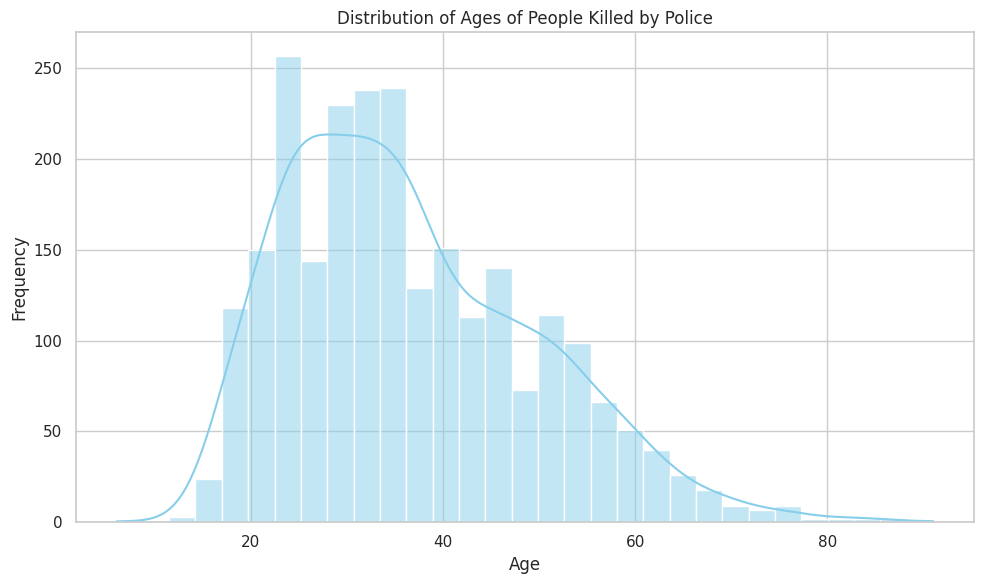

In [46]:
# Plot histogram and KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_fatalities['age'], kde=True, color='skyblue')
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

/tmp/ipykernel_34/3623103202.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'A']['age'], label='Asian', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_34/3623103202.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'W']['age'], label='White', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

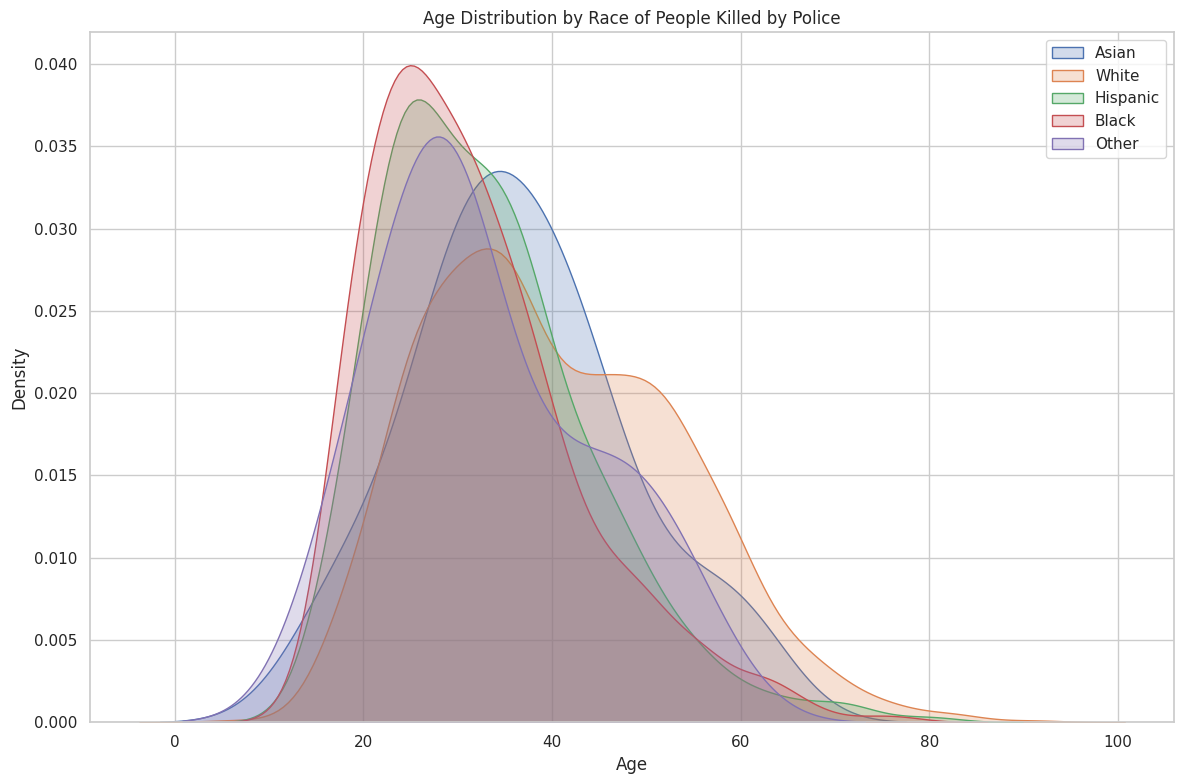

In [47]:
# Create separate KDE plots for each race using Seaborn
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'A']['age'], label='Asian', shade=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'W']['age'], label='White', shade=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'H']['age'], label='Hispanic', shade=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'B']['age'], label='Black', shade=True)
sns.kdeplot(data=df_fatalities[df_fatalities['race'] == 'O']['age'], label='Other', shade=True)

plt.title('Age Distribution by Race of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Race of People Killed</span>

Create a chart that shows the total number of people killed by race. 

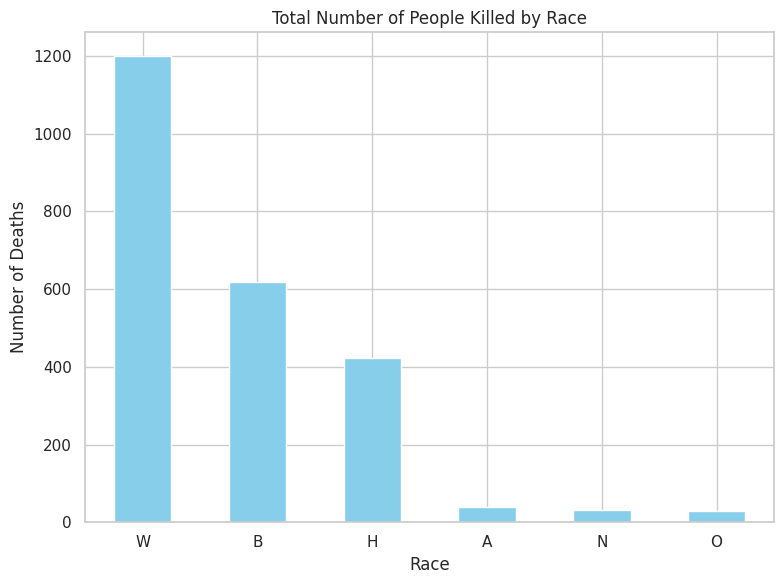

In [48]:
# Calculate number of people killed by race
race_counts = df_fatalities['race'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.title('Total Number of People Killed by Race')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Mental Illness and Police Killings</span>

What percentage of people killed by police have been diagnosed with a mental illness?

In [49]:
# Calculate total number of people killed
total_killed = len(df_fatalities)

# Calculate number of people with signs of mental illness
mental_illness_count = df_fatalities['signs_of_mental_illness'].sum()

# Calculate percentage of people with signs of mental illness
mental_illness_percentage = (mental_illness_count / total_killed) * 100

# Print the results
print(f"Percentage of people killed by police with signs of mental illness: {mental_illness_percentage:.2f}%")

Percentage of people killed by police with signs of mental illness: 24.97%


## <span style="color:#102c57;font-family:roboto;font-weight:bold">In Which Cities Do the Most Police Killings Take Place?</span>
<p>Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?</p>  

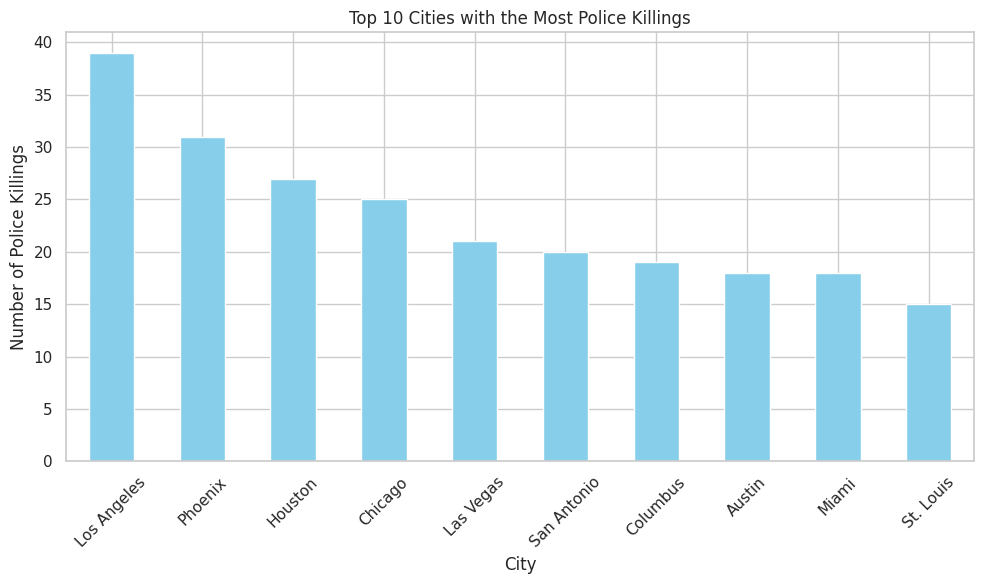

In [50]:
# Calculate the top 10 cities with the most police killings
top_cities = df_fatalities['city'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Police Killings')
plt.title('Top 10 Cities with the Most Police Killings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
top_cities

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Rate of Death by Race</span>

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [53]:
# Assuming df_fatalities already filtered to top 10 cities
top_10_cities = ['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',  'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis']

# Calculate total police killings per city
city_killings = df_fatalities[df_fatalities['city'].isin(top_10_cities)]['city'].value_counts()

# Calculate share of each race per city
city_race_share = df_fatalities[df_fatalities['city'].isin(top_10_cities)].groupby(['city', 'race']).size() / city_killings

# Print the results
print("Rate of Police Killings by Race in Top 10 Cities:")
print(city_race_share)

Rate of Police Killings by Race in Top 10 Cities:
city         race
Austin       B      0.17
             H      0.11
             W      0.72
Chicago      B      0.84
             H      0.04
             W      0.08
Columbus     B      0.58
             O      0.05
             W      0.32
Houston      A      0.04
             B      0.56
             H      0.22
             N      0.04
             W      0.11
Las Vegas    B      0.14
             H      0.24
             W      0.43
Los Angeles  A      0.03
             B      0.26
             H      0.49
             W      0.15
Miami        B      0.44
             H      0.33
             W      0.17
Phoenix      B      0.06
             H      0.35
             N      0.10
             W      0.39
San Antonio  B      0.15
             H      0.60
             W      0.15
St. Louis    B      0.73
             W      0.20
dtype: float64


## <span style="color:#102c57;font-family:roboto;font-weight:bold">Create a Choropleth Map of Police Killings by US State</span>

Which states are the most dangerous? 
Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [54]:
# Aggregate the number of police killings by state
state_killings = df_fatalities['state'].value_counts().reset_index()
state_killings.columns = ['state', 'killings']

# Print the results
print(state_killings)

   state  killings
0     CA       424
1     TX       225
2     FL       154
3     AZ       118
4     OH        79
5     OK        78
6     CO        74
7     GA        70
8     NC        69
9     MO        64
10    WA        62
11    IL        62
12    TN        59
13    LA        57
14    NM        51
15    PA        51
16    AL        50
17    VA        47
18    NY        45
19    SC        44
20    WI        43
21    KY        43
22    IN        43
23    NV        42
24    MD        38
25    OR        38
26    MI        37
27    NJ        35
28    MN        32
29    WV        27
30    AR        26
31    KS        24
32    MS        23
33    UT        23
34    MA        22
35    ID        17
36    NE        15
37    AK        15
38    ME        13
39    IA        12
40    MT        11
41    HI        11
42    DC        11
43    SD        10
44    CT         9
45    WY         8
46    DE         8
47    NH         7
48    ND         4
49    VT         3
50    RI         2


In [55]:
# Create the choropleth map
fig = px.choropleth(
    state_killings,
    locations='state',
    locationmode='USA-states',
    color='killings',
    color_continuous_scale='Reds',
    scope='usa',
    labels={'killings': 'Number of Killings'},
    title='Police Killings by US State'
)

fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    )
)

fig.show()

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Number of Police Killings Over Time</span>

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [56]:
# Convert 'date' column to datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y')

# Print the DataFrame to check the date conversion
print(df_fatalities.head())

   id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-01-02              shot         gun 53.00   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun 47.00   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon 32.00   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        Fals

In [57]:
# Aggregate the number of police killings by date
killings_over_time = df_fatalities['date'].value_counts().sort_index()

# Print the results
print(killings_over_time)

date
2015-01-02    2
2015-01-03    1
2015-01-04    3
2015-01-05    1
2015-01-06    4
             ..
2017-07-26    4
2017-07-27    5
2017-07-28    3
2017-07-29    1
2017-07-31    2
Name: count, Length: 879, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



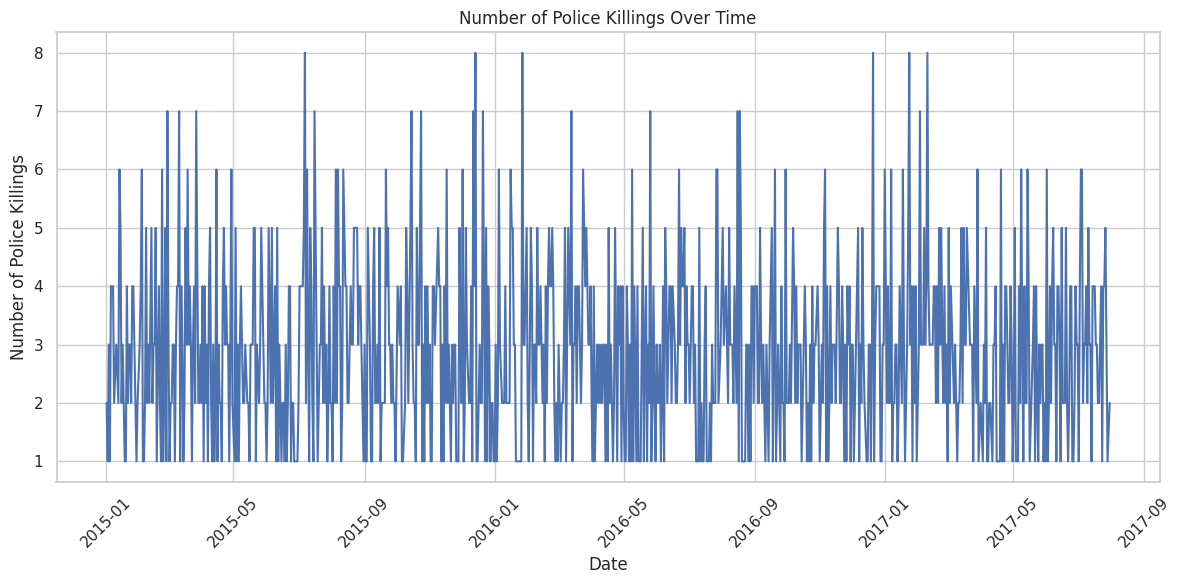

In [58]:
# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=killings_over_time)
plt.xlabel('Date')
plt.ylabel('Number of Police Killings')
plt.title('Number of Police Killings Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



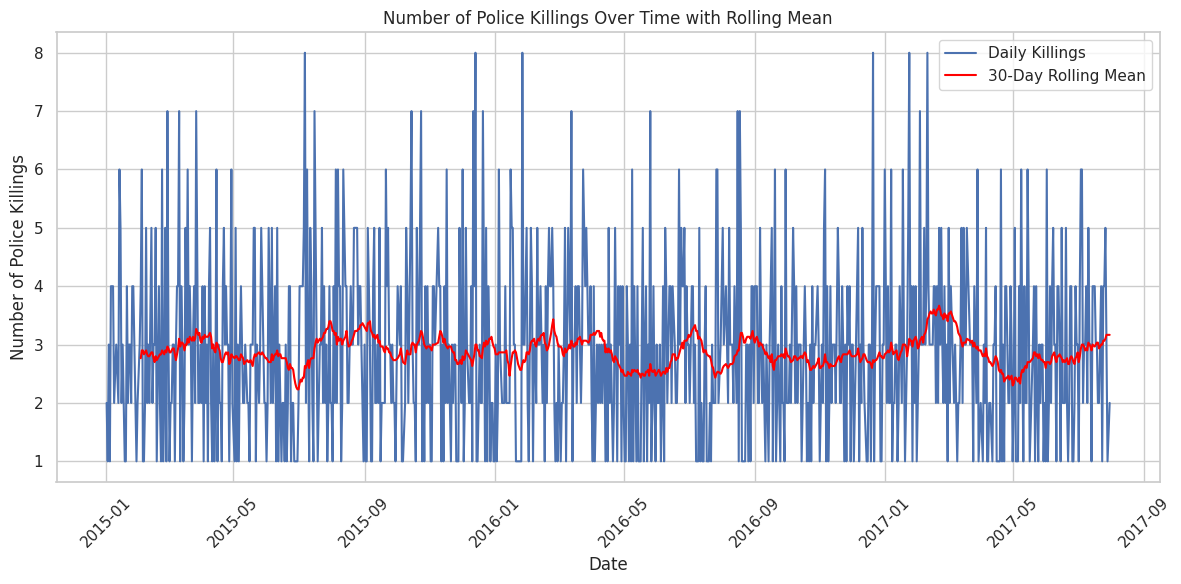

In [59]:
# Calculate rolling mean to smooth out the data
killings_over_time_rolling = killings_over_time.rolling(window=30).mean()

# Plot the original and rolling mean data
plt.figure(figsize=(12, 6))
sns.lineplot(data=killings_over_time, label='Daily Killings')
sns.lineplot(data=killings_over_time_rolling, label='30-Day Rolling Mean', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Police Killings')
plt.title('Number of Police Killings Over Time with Rolling Mean')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## <span style="color:#102c57;font-family:roboto;font-weight:bold">Epilogue</span>

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).